Abnormal


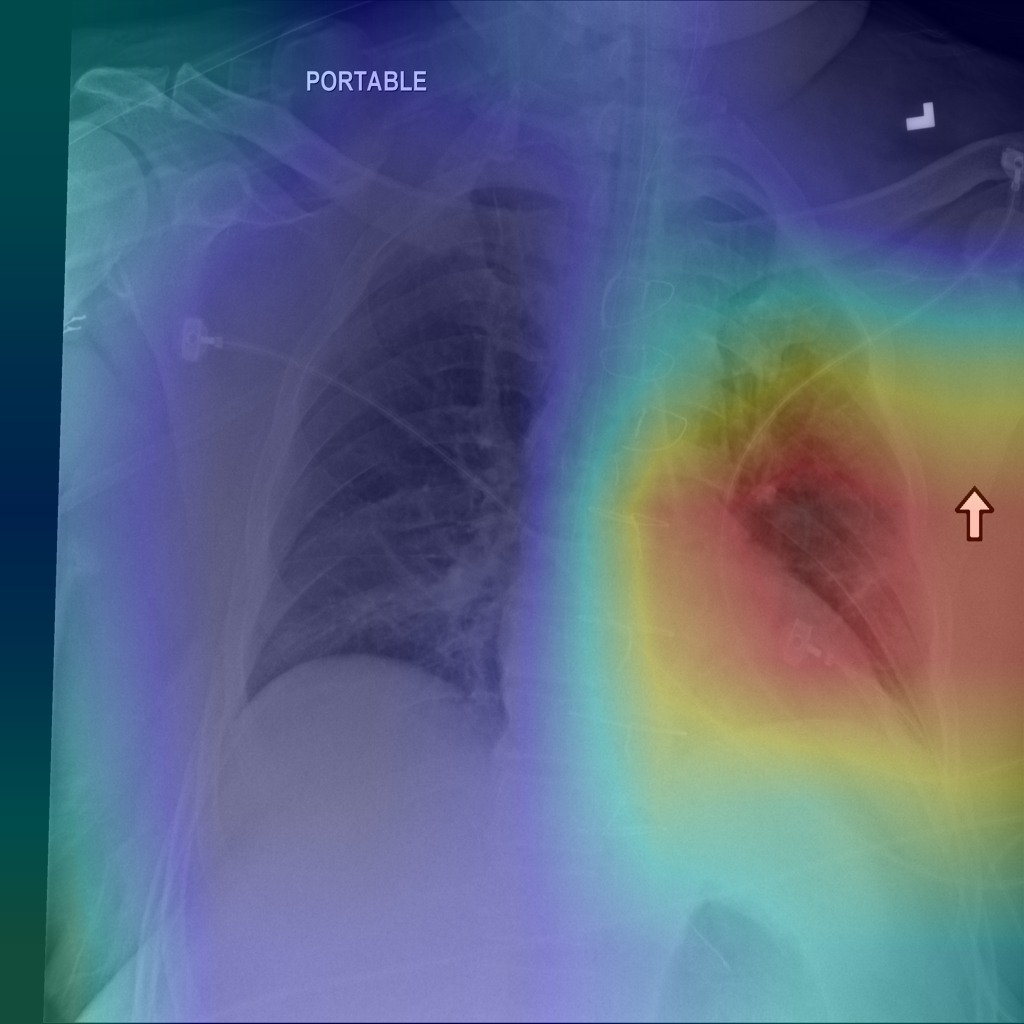

Lung Abnormality


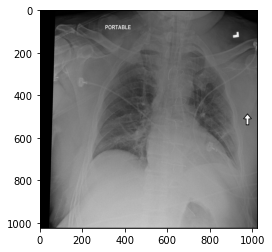

Atelectasis


In [30]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import torchvision
import cv2
import torch
from torchvision.models import densenet121
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt

# Define the model architecture
class ModifiedCheXNet(nn.Module):
    def __init__(self, num_classes):
        super(ModifiedCheXNet, self).__init__()
        self.base_model = models.densenet121(pretrained=True)
        num_features = self.base_model.classifier.in_features
        self.base_model.classifier = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.base_model(x)
    
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

input_path = 'demo_images/00000175_001_atelectasis.png'
output_path = 'outputs/00000175_001_atelectasis.png'
# Load the saved model
model1 = ModifiedCheXNet(num_classes=2)
model1.load_state_dict(torch.load('model1_2.pth'))
model1.eval()

# Load and preprocess the image
image = Image.open(input_path).convert('RGB')
image = transform(image).unsqueeze(0)

# Pass the input image through the model
with torch.no_grad():
    output = model1(image)
    _, predicted = torch.max(output.data, 1)

# Print the predicted class
if predicted.item() == 0:
    print("Normal")
elif predicted.item() == 1:
    print("Abnormal")
    # Define forward and backward hooks
    def forward_hook(module, input, output):
        activation.append(output)

    def backward_hook(module, grad_in, grad_out):
        grad.append(grad_out[0])

    # Register hooks to get the tensors
    model1.base_model.features[-1].register_forward_hook(forward_hook)
    model1.base_model.features[-1].register_backward_hook(backward_hook)

    grad=[]
    activation=[]

    # forward pass to get activations
    out = model1(image)
    predicted_class = torch.argmax(out)
    #print(f'Predicted Class: {predicted_class}')

    # class for golf ball
    class_index_golf_ball = 574
    loss = out[0, predicted_class]

    # clear the gradients
    model1.zero_grad()

    # backward pass to get gradients
    loss.backward()

    # get the gradients and activations collected in the hook
    grads = grad[0].cpu().data.numpy().squeeze()
    fmap = activation[0].cpu().data.numpy().squeeze()

#     print(f'Map Shape: {fmap.shape}')
#     print(f'Gradients Shape: {grads.shape}')
    
#     print("grads.shape",grads.shape)
    tmp=grads.reshape([grads.shape[0],-1])
    # Get the mean value of the gradients of every featuremap
    weights=np.mean(tmp,axis=1)
#     print("weights.shape",weights.shape)

    cam = np.zeros(grads.shape[1:])
    for i,w in enumerate(weights):
      cam += w*fmap[i,:]
    cam=(cam>0)*cam
#     print("cam.shape",cam.shape)
#     print(cam)
    cam=cam/cam.max()*255
#     print(cam)
#     print(cam > 255*0.85)
    pic=cv2.imread(input_path,1)
    npic=np.array(torchvision.transforms.ToPILImage()(pic).convert('RGB'))
#     print(npic.shape)
#     print("hi")

    cam = cv2.resize(cam,(npic.shape[1],npic.shape[0]))
#     print(cam.shape)

    heatmap=cv2.applyColorMap(np.uint8(cam),cv2.COLORMAP_JET)

    cam_img=npic*0.7+heatmap*0.3
#     print(cam_img.shape)
    #display(Image.fromarray(heatmap[:,:,::-1]))
    display(torchvision.transforms.ToPILImage()(np.uint8(cam_img[:,:,::-1])))
    
    cv2.imwrite(output_path, cam_img)
    
    model2 = ModifiedCheXNet(4)
    model2.load_state_dict(torch.load('model2.pth'))
    model2.eval()
    
    image_path = output_path
    image = Image.open(image_path).convert('RGB')
    op = image
    image = transform(image).unsqueeze(0).to('cpu')
    plt.imshow(op.resize((op.size[0], op.size[1])))
#     plt.show()
    
    # Pass the image through the model
    with torch.no_grad():
        output2 = model2(image)
        _, predicted2 = torch.max(output2.data, 1)
    if predicted2.item() == 1:
        print("Heart Abnormality")
    elif predicted2.item() == 2:
        print("Pleura Abnormality")
    elif predicted2.item() == 3:
        print("Airway Abnormality")
    elif predicted2.item() == 0:
        print("Lung Abnormality")
        
        model3 = ModifiedCheXNet(9)
        model3.load_state_dict(torch.load('layer3/model3.pth'))
        model3.eval()
        image_path = input_path
        image = Image.open(image_path).convert('RGB')
        op = image
        image = transform(image).unsqueeze(0).to('cpu')
        plt.imshow(op.resize((op.size[0], op.size[1])))
        plt.show()
        # Pass the image through the model
        with torch.no_grad():
            output3 = model3(image)
            _, predicted3 = torch.max(output3.data, 1)
        if predicted3.item() == 0:
            print("Atelectasis")
        elif predicted3.item() == 1:
            print("Consolidation")
        elif predicted3.item() == 2:
            print("Infiltration")
        elif predicted3.item() == 3:
            print("Pneumothorax")
        elif predicted3.item() == 4:
            print("Edema")
        elif predicted3.item() == 5:
            print("Emphysema")
        elif predicted3.item() == 6:
            print("Fibrosis")
        elif predicted3.item() == 7:
            print("Nodule")
        elif predicted3.item() == 8:
            print("Mass")
        else:
            print("None of them")

    
    
